In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# 数据导入

In [2]:
training_data = datasets.FashionMNIST(root='data',
                     train=True,
                     download=True,
                     transform=ToTensor())
test_data = datasets.FashionMNIST(root='data',
                     train=False,
                     download=True,
                     transform=ToTensor())

In [3]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [4]:
images, labels = next(iter(train_dataloader))

In [5]:
images.shape

torch.Size([64, 1, 28, 28])

In [6]:
labels.shape

torch.Size([64])

In [7]:
labels[0]

tensor(9)

In [8]:
import matplotlib.pyplot as plt

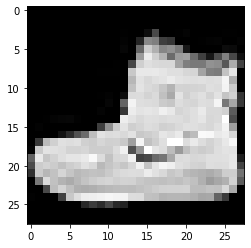

In [9]:
plt.imshow(images[0].reshape(28, 28), cmap='gray')

# 创建模型

In [10]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)   
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [11]:
# 创建模型, 并拷贝到GPU上
model = Model().to(device)

# 指定损失函数和优化器.

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# 训练

In [13]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # 拷贝到GPU
        X, y = X.to(device), y.to(device)
        # 计算损失
        pred =  model(X)
        loss = loss_fn(pred, y)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 打印
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f}  [{current: >5d}/ {size:>5d}]')

In [14]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100 * correct):>0.1f}, Avg Loss: {test_loss:>8f}\n')

In [15]:
epochs = 10
for t in range(epochs):
    print(f'Epoch {t + 1}\n-------------------------------------------')
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print('Done!')

Epoch 1
-------------------------------------------
loss: 2.288755  [    0/ 60000]
loss: 2.296581  [ 6400/ 60000]
loss: 2.267184  [12800/ 60000]
loss: 2.270406  [19200/ 60000]
loss: 2.242374  [25600/ 60000]
loss: 2.206937  [32000/ 60000]
loss: 2.223131  [38400/ 60000]
loss: 2.182037  [44800/ 60000]
loss: 2.182667  [51200/ 60000]
loss: 2.141050  [57600/ 60000]
Test Error: 
 Accuracy: 38.9, Avg Loss: 2.144705

Epoch 2
-------------------------------------------
loss: 2.149668  [    0/ 60000]
loss: 2.154207  [ 6400/ 60000]
loss: 2.087603  [12800/ 60000]
loss: 2.110466  [19200/ 60000]
loss: 2.050269  [25600/ 60000]
loss: 1.986395  [32000/ 60000]
loss: 2.020153  [38400/ 60000]
loss: 1.935390  [44800/ 60000]
loss: 1.946201  [51200/ 60000]
loss: 1.862492  [57600/ 60000]
Test Error: 
 Accuracy: 58.1, Avg Loss: 1.868002

Epoch 3
-------------------------------------------
loss: 1.899938  [    0/ 60000]
loss: 1.878821  [ 6400/ 60000]
loss: 1.755918  [12800/ 60000]
loss: 1.800761  [19200/ 60000]


# 保存模型

In [16]:
# 保存模型
torch.save(model.state_dict(), 'model.pth')

# 模型验证

In [17]:
# 先创建模型实例对象
model = Model()
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [18]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [20]:
x.shape

torch.Size([1, 28, 28])

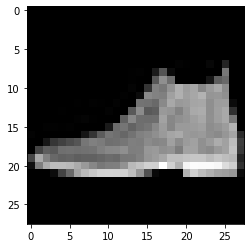

In [21]:
plt.imshow(x.reshape(28, 28), cmap='gray')

In [22]:
test_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [23]:
test_data[0][1]

9